<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Project_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CALL LIBRARIES**


In [1]:
#install library
!pip install google-search-results
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32020 sha256=a0c4fec72873250d5592cde8d847254fdeedbad9e05fd8e1d1aa2a26d1dba691
  Stored in directory: /root/.cache/pip/wheels/68/8e/73/744b7d9d7ac618849d93081a20e1c0deccd2aef90901c9f5a9
Successfully built google-search-results
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import library needed for the search
from google.colab import drive 
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt
from serpapi import GoogleSearch
import plotly.express as px
import squarify
import seaborn as sns
import re 

plt.style.use('fivethirtyeight')

Mounted at /content/drive


# **SCRIPT**

In [118]:
#SerpApi google search
search_term="Data Analyst" #Job to be searching
search_location="United States" #Places where you search https://serpapi.com/google-countries


params = {
  "q": search_term,
  "location": search_location,
  "engine" : "google_jobs",
  "hl": "en",
  "gl": "us",
  "google_domain": "google.com",
  "api_key": "a74096ebb3b875e086bdf8353fb1e90edbd5bdbb2c9e9ea9bf863f98e55ac489"
}

In [119]:
#creating dataframe with the information obtenied of the search
search = GoogleSearch(params)
results = search.get_dict()
jobs_df = results['jobs_results']
jobs_df = pd.DataFrame(jobs_df)
jobs_df = pd.concat([pd.DataFrame(jobs_df),
                     pd.json_normalize(jobs_df['detected_extensions'])],
                    axis=1).drop('detected_extensions',1)
         

<ipython-input-119-d668609e91a2>:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [120]:
#Quick looking on the dataframe
jobs_df.head(1)

,title,company_name,location,via,description,job_highlights,related_links,thumbnail,extensions,job_id,posted_at,schedule_type,salary,work_from_home
0,Data Analyst II,Corporate,Missouri,via Centene - Centene Corporation,You could be the one who changes everything fo...,"[{'title': 'Qualifications', 'items': ['Bachel...",[{'link': 'https://www.google.com/search?ucbcb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[2 days ago, Full-time, Health insurance, Dent...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgSUkiLCJodG...,2 days ago,Full-time,NaN,NaN


In [121]:
jobs_df.isnull().sum() #Looking for null values

title             0
company_name      0
location          0
via               0
description       0
job_highlights    0
related_links     0
thumbnail         3
extensions        0
job_id            0
posted_at         0
schedule_type     0
salary            9
work_from_home    6
dtype: int64

In [122]:
jobs_df.shape #Shape of the DataFrame

(10, 14)

In [123]:
jobs_df.info() #Information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           10 non-null     object
 1   company_name    10 non-null     object
 2   location        10 non-null     object
 3   via             10 non-null     object
 4   description     10 non-null     object
 5   job_highlights  10 non-null     object
 6   related_links   10 non-null     object
 7   thumbnail       7 non-null      object
 8   extensions      10 non-null     object
 9   job_id          10 non-null     object
 10  posted_at       10 non-null     object
 11  schedule_type   10 non-null     object
 12  salary          1 non-null      object
 13  work_from_home  4 non-null      object
dtypes: object(14)
memory usage: 1.2+ KB


**# HARD SKILLS **


In [124]:
#Normalize column
jobs = pd.json_normalize(jobs_df.job_highlights )

In [125]:
jobs_df2 = pd.DataFrame(jobs) #Creating DataFrame with data obtenied from the normalization
Ujobs = jobs_df2[0].apply(pd.Series) #applying Series to read data

#Ujobs.loc[Ujobs["items"].str.contains("SQL")]

In [126]:
Ujobs = Ujobs.drop(columns = "title") #Eliminated column with irrelevant information 
Ujobs = Ujobs.dropna()

In [127]:
Ujobs

,items
0,[Bachelor’s degree’s related field or equivale...
1,[What you'll do...\n\nPosition: Senior Data An...
2,[Experience in analysis supporting marketing o...
3,[3+ years of relevant experience working with ...
4,"[A passion for marketing and data analytics, S..."
5,"[Proficiency with analytical tools, knowledge ..."
6,[Four to five years of data analysis experienc...
7,[Bachelor's Degree in highly quantitative fiel...
8,[High School diploma equivalency with 2 years ...
9,[You’ll be an analytical thinker with expert t...


In [128]:
# Creating new DataFrame extracting data to search keywords
toolsJob = pd.DataFrame()
for i in Ujobs['items']:
  toolsJob = toolsJob.append(i,ignore_index=True)

<ipython-input-128-544123ef4084>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [129]:
# Extracting hard skill to do job

tools = []
for i in toolsJob[0]:
  if "SQL" in i:
    tools.append("SQL")


for i in toolsJob[0]:
  if "Python" in i:
    tools.append("Python")

for i in toolsJob[0]:  
  if " R " in i:
    tools.append("R")

for i in toolsJob[0]:   
  if "Excel" in i:
    tools.append("Excel")

for i in toolsJob[0]:
  if "Tableau" in i:
    tools.append("Tableau")

for i in toolsJob[0]:   
  if "Power BI" in i:
    tools.append("Power BI")

for i in toolsJob[0]:   
  if "TensorFlow" in i:
    tools.append("TensorFlow")    

**# AVERAGE TIME**

In [130]:
#Extracting time and place to work

time = []
for i in jobs_df['extensions']:
  if "Work from home" in i:
    time.append("Work from home")
  
for i in jobs_df['extensions']:
  if "Full-time" in i:
    time.append("Full-time")

for i in jobs_df['extensions']:
  if "Part-time" in i:
    time.append("Part-time")   



In [131]:
#jobs_df.to_csv('/content/drive/MyDrive/Colab Notebooks/2023/Jobs.csv')

In [132]:
import csv

new_data = jobs_df.values.tolist()

# Open the CSV file in write mode and write the new data to it
with open('/content/drive/MyDrive/Colab Notebooks/2023/Jobs.csv', 'a', newline='') as file:
    writer = csv.writer(file)

    # Write the new data to the file
    writer.writerows(new_data)

# **SUMMARY**

In [112]:
#Sunburst chart of the companies that offer the job

name = jobs_df.groupby(['company_name'])['company_name'].count()
px.sunburst(name, path=[name.index], values=name.values)

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


In [113]:
toolss = pd.DataFrame(tools)

(0.0, 8.0)

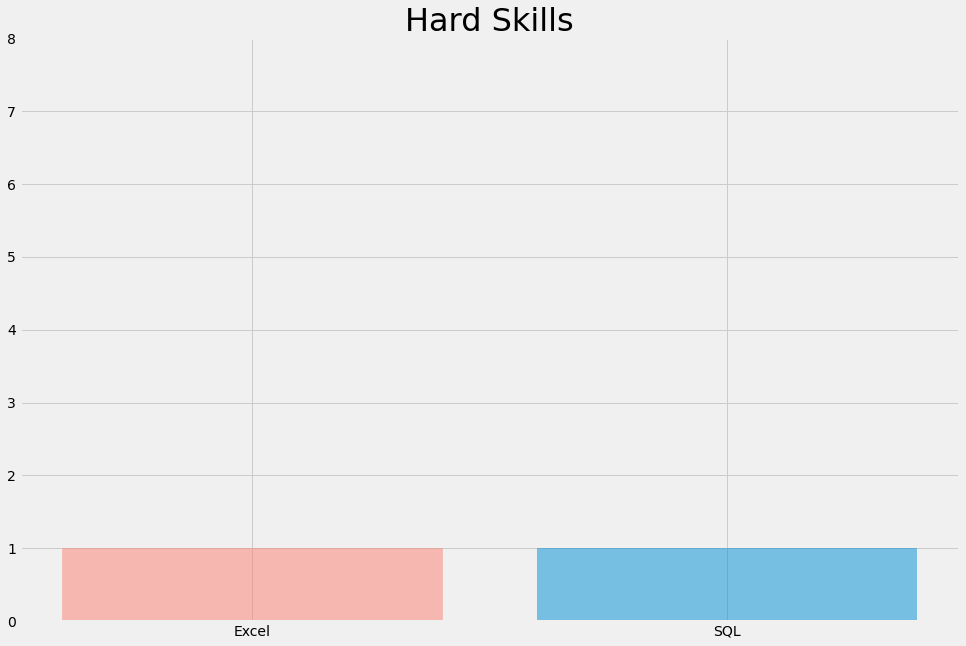

In [114]:
# Bar chart of the hard skills needed to execute the job
t = toolss.groupby(0)[0].count().sort_values(ascending=False)

plt.figure(figsize=(15,10))
fig = plt.bar(x=t.index, height=t.values, alpha=0.5)
fig[0].set_color('salmon')
plt.title("Hard Skills", fontsize=32)
plt.ylim(0,8)


(0.0, 11.0)

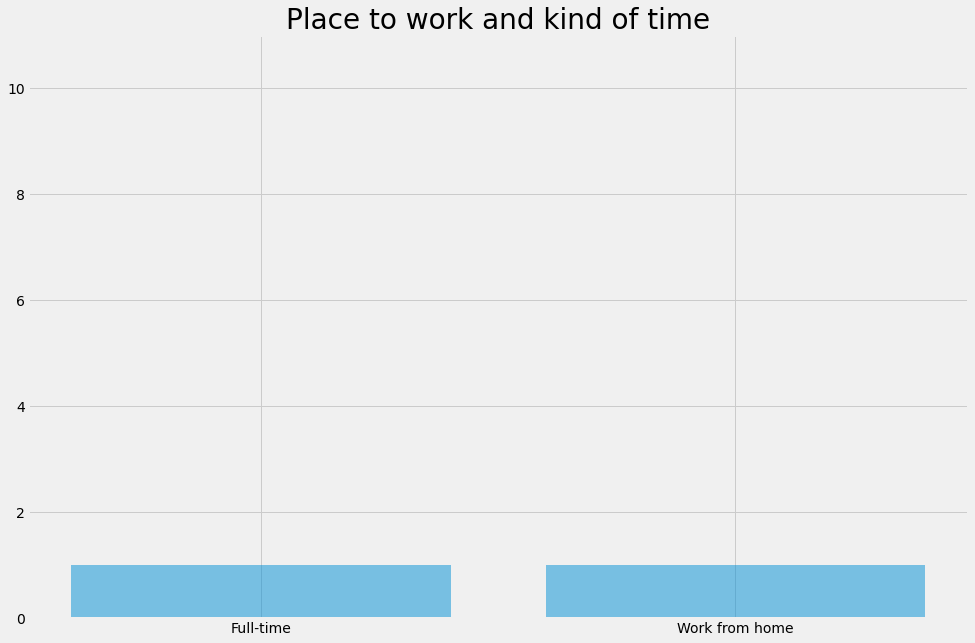

In [115]:
#Bar chart of the places and time to do the job

ti = pd.DataFrame(time)
tim =ti.groupby(0)[0].count().sort_values(ascending=False)

plt.figure(figsize=(15,10))
plt.bar(x=tim.index, height= tim.values, alpha=0.5)
plt.title("Place to work and kind of time", fontsize=28)
plt.ylim(0,11)


Text(0.5, 0, 'Posted at')

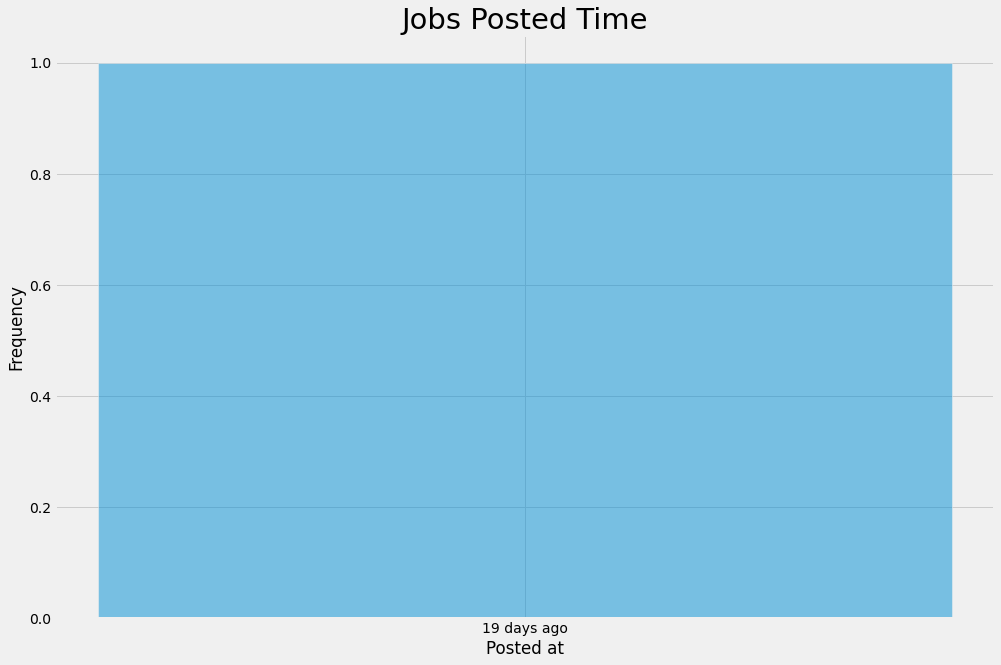

In [116]:
plt.figure(figsize=(15,10))
sns.histplot(jobs_df['posted_at'], bins=15, alpha=0.5)
plt.title("Jobs Posted Time", fontsize=29)
plt.ylabel("Frequency")
plt.xlabel("Posted at")

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

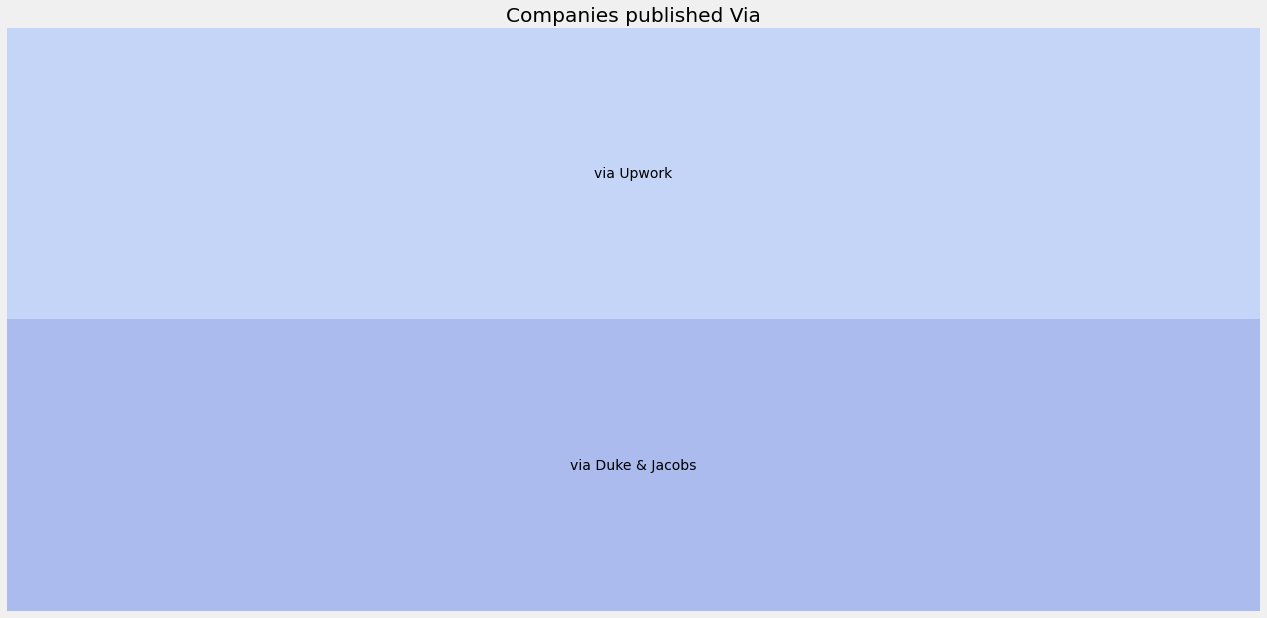

In [117]:
#Tree-map chart than where the companies published the vacancies

via = jobs_df.groupby(['via'])['via'].count().sort_values(ascending=False)
name

plt.figure(figsize=(20,10))
sizes=via.values
label=via.index
squarify.plot(sizes=sizes,label=label,color = sns.color_palette("coolwarm"), alpha=0.5)
plt.axis("off")
plt.title("Companies published Via")
plt.xticks(rotation=45, fontsize=20)